# Изучение закономерностей, определяющих успешность игр.

## Цели исследования:
Выявить закономерности влияющие на успешность игры для дольшейшего продвижения продукта
## Задачи исследования:
-Визуализировать пропуски.

-Изучить данные.

-Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать.

-Почистить пропуски в названии жанров и в годе релиза.

-Заменить пропущенные значения в поле "rating".

-Создать поле для определения общих продаж для каждой игры.

-Визуализировать сортировку игр по годам.

-Расчитать количество игр по годам для каждой платформы.

-Установить год, когда платформа была впервые указана в данных.

-Изучить в какой год платформа чаще всего упоминалась.

-Установить с какой разницей возникали новые платформы.

-Установить какое количество игр приходилось на каждый год.

-Установить медианное количество игр для каждой платформы.

-Установить среднее время жизни для популярных платформ.

#### Сделать прогноз на 2017 год

-Определить на каких платформах было больше всего продаж.

-Посчитать суммарную выручку для каждого из последних 4 лет для каждой платформы. Визуализировать полученные данные.

-Определить количество выбивающихся значений для каждой из платформ.

-Установить влияние на продажи игр оценок критиков и отзывов пользователей.

-Выяснить сколько игр приходится на каждый жанр.

-Выявить самые популярные и самые непопулярные жанры игр по продажам.

-Выяснить как продажи распределяются по количеству проданных игр. Какой жанр более прибыльный.

#### Проанализировать показатели продаж за 2016 год

-Проанализировать показатели продаж по популярным платформам.

                -Проанализировать показатели продаж по популярным платформам в Европе.
                
                -Проанализировать показатели продаж по популярным платформам в Америке.
                
                -Проанализировать показатели продаж по популярным платформам в Японии.
                
                -Проанализировать показатели продаж по популярным платформам в других регионах мира.
                
                -Визуализировать данные для оценки и сравнения.
                
                -Построить портрет по играм популярных платформ для жителей указанных выше стран.
                
-Проанализировать показатели продаж по популярным жанрам.

                -Проанализировать показатели продаж по популярным жанрам в Европе.
                
                -Проанализировать показатели продаж по популярным жанрам в Северной Америке.¶
                
                -Проанализировать показатели продаж по популярным жанрам в Японии.
                
                -Проанализировать показатели продаж по популярным жанрам в других регионах .
                
                -Визуализировать данные для оценки и сравнения.
                
                -Дополнить существующий портрет по играм популярных платформ для жителей указанных выше стран.
                
-Изучить влияние рейтинга на продажи для каждого региона. Визуализировать это.

-В рамках исследования сформулировать две гипотезы и проверить их.

-Написать общий вывод.


## Описание данных

Name — название игры;

Platform — платформа;

Year_of_Release — год выпуска;

Genre — жанр игры;

NA_sales — продажи в Северной Америке (миллионы проданных копий);

EU_sales — продажи в Европе (миллионы проданных копий);

JP_sales — продажи в Японии (миллионы проданных копий);

Other_sales — продажи в других странах (миллионы проданных копий);

Critic_Score — оценка критиков (максимум 100);

User_Score — оценка пользователей (максимум 10);

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию;

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('games.csv')

Привести колонки к нижнему регистру.

In [3]:
data.columns = data.columns.str.lower()

Визуализировать пропуски.

In [4]:
dont_skip = data.notna().mean().to_frame().rename(columns = {0:'dont_skip'})
omissions = data.isna().mean().to_frame().rename(columns = {0:'omissions'})
res = pd.merge(dont_skip, omissions, left_index=True, right_index=True)
res.index.name = res.index.name = 'field_name'

res.reset_index(level =['field_name'], inplace = True)
res = res.sort_values(by = 'omissions' , ascending = False)
res = res.loc[res['omissions'] > 0]
res

,field_name,dont_skip,omissions
8,critic_score,0.486808,0.513192
10,rating,0.595214,0.404786
9,user_score,0.599103,0.400897
2,year_of_release,0.983907,0.016093
0,name,0.999880,0.000120
3,genre,0.999880,0.000120


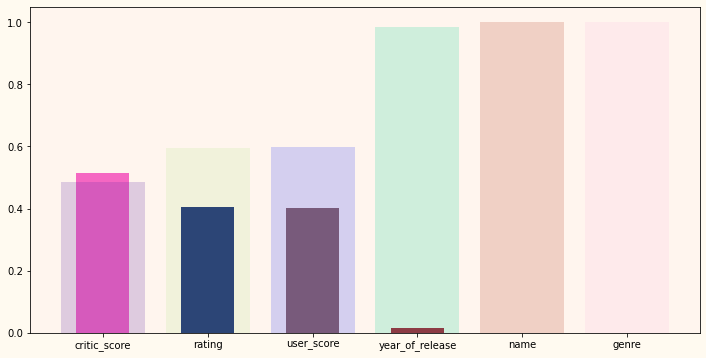

In [5]:
fig, ax = plt.subplots()

color_rectangle = np.random.rand(11, 3)    # RGB
ax.bar(res['field_name'], res['omissions'],color = color_rectangle,width = 0.5)

color_rectangle = np.random.rand(11, 4)    # RGBA
color_rectangle[:,3] = 0.2
ax.bar(res['field_name'], res['dont_skip'],color = color_rectangle)

fig.set_figwidth(12)   
fig.set_figheight(6)   
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell');

Больше всего пропусков содержится в поле critic_score. Также есть пропуски в названии жанров, их стоит удалить, чтобы не учитывать их при анализе.

Изучить данные.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы можем заметить важную вещь: у нас есть значения годов, они с типом int , которое не подходит для даты, и у нас также есть пропуски в этом поле, поэтому нам необходимо избавиться от пропусков, чтобы поменять тип данных.

Нами были обнаружены пропуски в годах выпуска игр. Можно ли было их как-то восстановить, чтобы добиться более полной картины по данным. Решили сделать это с помощью замены нанов по имеющимся данным Википедии.

Вернуть значения по годам, используя данные официального источника: Википедии.

In [7]:
data.loc[data['name'] == 'Tomb Raider (2013)','Year_of_Release'] = 2013
data.loc[data['name'] == 'Dead Space 3','Year_of_Release'] = 2013
data.loc[data['name'] == 'Dead Island: Riptide','Year_of_Release'] = 2013
data.loc[data['name'] == 'Monster Hunter Frontier Online','Year_of_Release'] = 2013
data.loc[data['name'] == 'The Daring Game for Girls','Year_of_Release'] = 2014
data.loc[data['name'] == 'Homeworld Remastered Collection','Year_of_Release'] = 2015
data.loc[data['name'] == 'Clockwork Empires','Year_of_Release'] = 2016

Единственная игра, которую мы не смогли заполнить в годах выпуска, оказалась : "Brothers in Arms: Furious 4" . Причина почему мы не смогли заполнить ее значение: эта игра не была выпущена по сведением из Википедии. Ее разработка прекратилась в 2015 году.

Поэтому было решено удалить ее значения из датасета.

In [8]:
data = data.dropna(subset = ['year_of_release'])

Проверить, почистили ли мы все значения пропусков годов в данных.

In [9]:
display(data.loc[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Year_of_Release


Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать.

In [10]:
data = data.replace('tbd',np.nan)

tbd (То Be Defined) означает: пока не определен, Nun  - это когда отстуствует информация. tbd значит примерно тоже самое что и nun, предлагаю ее заменить на nun.

Заполнить пропуски словом пропуск, чтобы потом можно было использовать эту информацию для определения
влияния рейтинга на продажи.

In [11]:
data['rating'] = data['rating'].fillna("пропуск")

Изменить типы данных.

In [12]:
data['user_score'] = data['user_score'].astype('float64')
data['year_of_release'] = data['year_of_release'].astype('int64')

Проверить какие данные были пропущены в названии жанров.

In [13]:
display(data.loc[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Year_of_Release
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,пропуск,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,пропуск,NaN


Как писалось выше после анализа количества пропусков, мы их удалим.

Удалить отсутствующие значения в названии жанра.

In [14]:
data = data.dropna(subset = ['genre'])

Проверить, успешно ли прошло удаление.

In [15]:
display(data.loc[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Year_of_Release


Создать поле для определения общих продаж для каждой игры.

In [16]:
data['general_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['general_sales'] = round(data['general_sales'],2)

Отсортировать игры по годам.

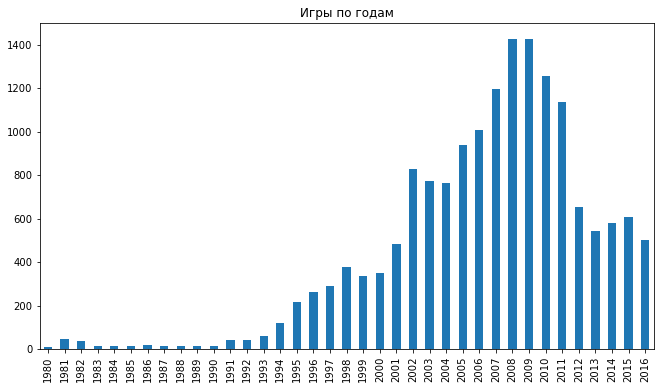

In [17]:
data['year_of_release'].value_counts().sort_index().plot(kind = "bar", figsize = (11,6),title = 'Игры по годам');

Расчитать количество игр по годам для каждой платформы.

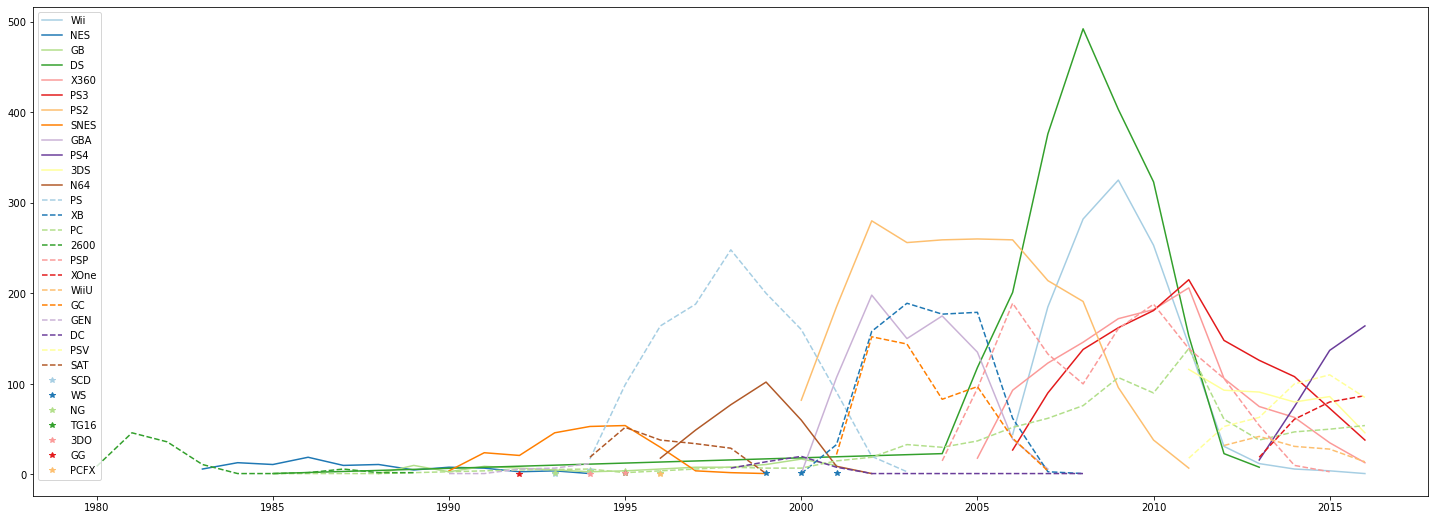

In [18]:
fig, axs = plt.subplots(figsize=(25,9))

color_style = [(c,s) for s in ['-','--','*'] for c in sns.color_palette("Paired", as_cmap=True).colors]

for i, (c,s) in zip(data.platform.unique(), color_style):
    data.loc[data['platform']==i]['year_of_release'].value_counts().sort_index().plot(label=i, style=s, color=c, ax=axs)
plt.legend()
axs.set_facecolor('white')

Установить год, когда платформа была впервые указана в данных.

In [19]:
platform_creation_date = data.groupby('platform').agg({'year_of_release':'min'}).reset_index()
platform_creation_date = platform_creation_date.sort_values(by = 'year_of_release',ascending = False)
platform_creation_date

,platform,year_of_release
30,XOne,2013
18,PS4,2013
27,WiiU,2012
2,3DS,2011
20,PSV,2011
17,PS3,2006
26,Wii,2006
28,X360,2005
19,PSP,2004
7,GC,2001


Изучить в какой год платформа чаще всего упоминалась.

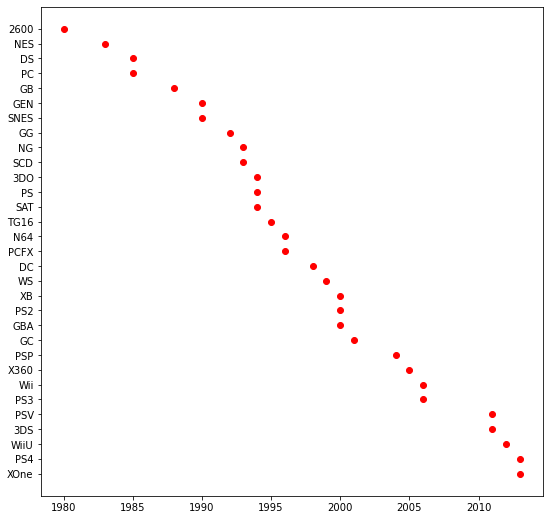

In [20]:
fig, ax = plt.subplots(figsize = (9,9))
plt.scatter(platform_creation_date['year_of_release'],platform_creation_date['platform'],c='r');

Установить с какой разницей возникали новые платформы.

In [21]:
period_under_review = platform_creation_date['year_of_release'].sort_values(ascending=False)
count = 0
for present_value in period_under_review:
    difference_in_years = present_value-count
    count=present_value
    print(difference_in_years)

period_under_review

2013
0
-1
-1
0
-5
0
-1
-1
-3
-1
0
0
-1
-1
-2
0
-1
-1
0
0
-1
0
-1
-2
0
-2
-3
0
-2
-3


30    2013
18    2013
27    2012
2     2011
20    2011
17    2006
26    2006
28    2005
19    2004
7     2001
6     2000
16    2000
29    2000
25    1999
3     1998
10    1996
14    1996
24    1995
21    1994
15    1994
1     1994
22    1993
12    1993
9     1992
23    1990
8     1990
5     1988
13    1985
4     1985
11    1983
0     1980
Name: year_of_release, dtype: int64

Почти что каждый год выходят новые платформы, если не считать период с 1977 по 1981 год и с 2006 по 2011 год.

Установить какое количество игр приходилось на каждый год. 

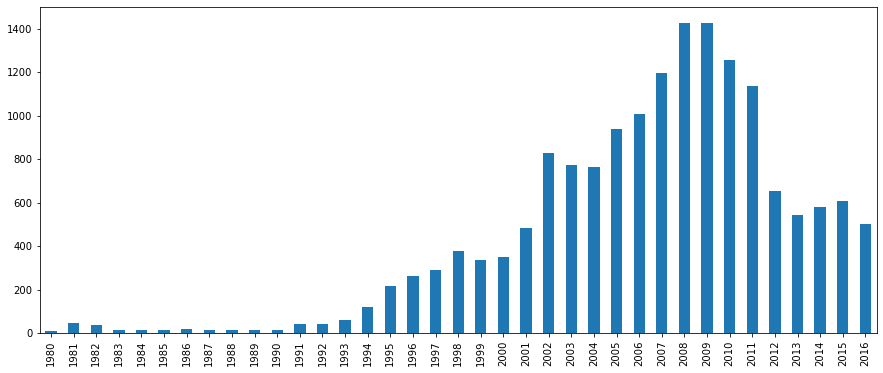

In [22]:
data['year_of_release'].value_counts().sort_index().plot.bar(figsize=(15,6));

Установить медианное количество игр для каждой платформы.

In [23]:
data.groupby('platform').agg({'year_of_release' : 'nunique'}).median()

year_of_release    7.0
dtype: float64

Установить среднее время жизни для PS3.

11

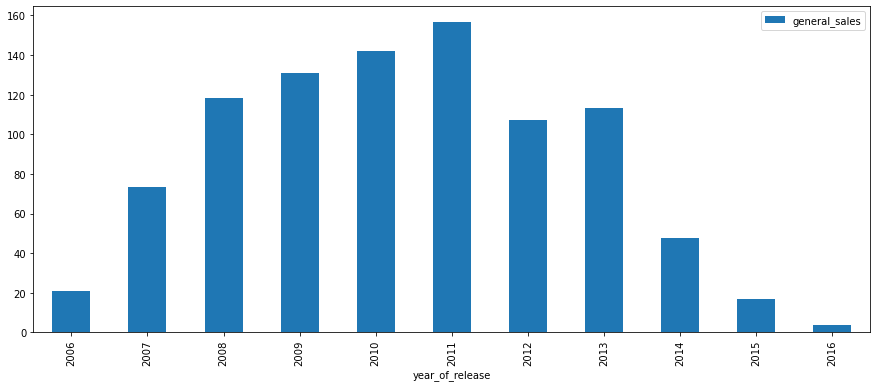

In [24]:
ps3_average_lifespan = data.loc[data['platform'] == 'PS3']
ps3_average_lifespan_ = ps3_average_lifespan.groupby('year_of_release').agg({'general_sales':'sum'}).sort_index()
ps3_average_lifespan_.plot.bar(figsize = (15,6))
ps3_average_lifespan_ = ps3_average_lifespan_.reset_index()
ps3_average_lifespan['year_of_release'].nunique()

Установить среднее время жизни для PS4.

year_of_release    4.0
dtype: float64

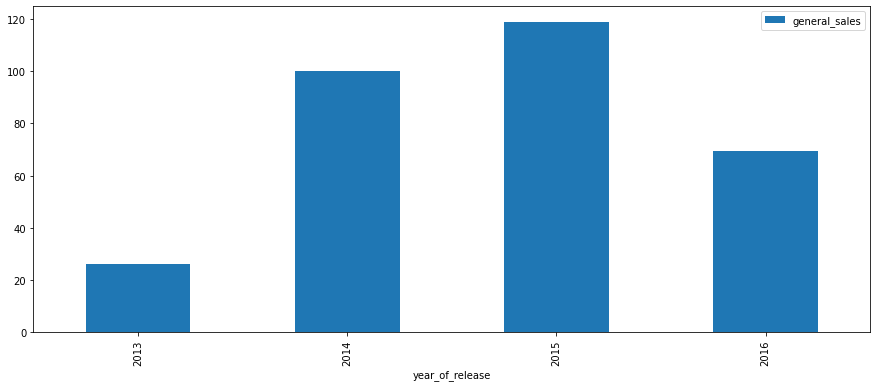

In [25]:
ps4_average_lifespan = data.loc[data['platform'] == 'PS4']
ps4_average_lifespan_ = ps4_average_lifespan.groupby('year_of_release').agg({'general_sales':'sum'}).sort_index()
ps4_average_lifespan_.plot.bar(figsize = (15,6))
ps4_average_lifespan_ = ps4_average_lifespan_.reset_index()
ps4_average_lifespan.groupby('platform').agg({'year_of_release' : 'nunique'}).median()

Установить среднее время жизни для Wii.

year_of_release    11.0
dtype: float64

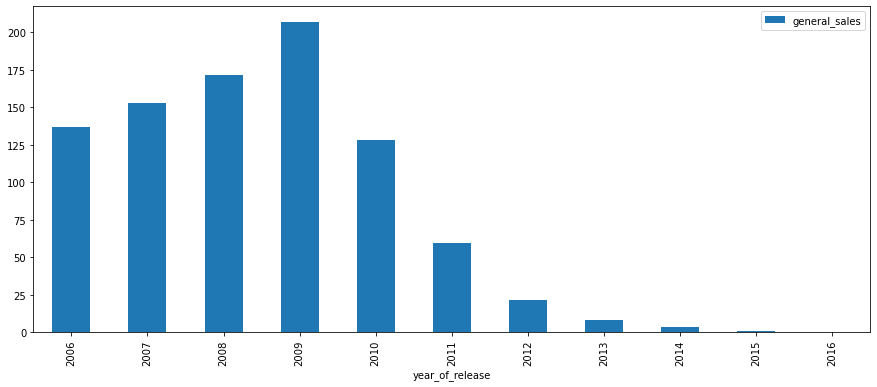

In [26]:
wii_average_lifespan = data.loc[data['platform'] == 'Wii']
wii_average_lifespan_ = wii_average_lifespan.groupby('year_of_release').agg({'general_sales':'sum'}).sort_index()
wii_average_lifespan_.plot.bar(figsize = (15,6))
wii_average_lifespan_ = wii_average_lifespan_.reset_index()
wii_average_lifespan.groupby('platform').agg({'year_of_release' : 'nunique'}).median()

Установить среднее время жизни для PSV.

year_of_release    6.0
dtype: float64

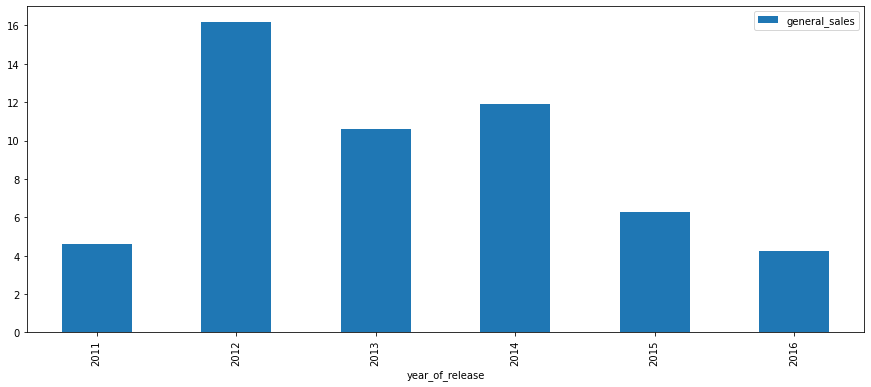

In [27]:
psv_average_lifespan = data.loc[data['platform'] == 'PSV']
psv_average_lifespan_ = psv_average_lifespan.groupby('year_of_release').agg({'general_sales':'sum'}).sort_index()
psv_average_lifespan_.plot.bar(figsize = (15,6))
psv_average_lifespan_ = psv_average_lifespan_.reset_index()
psv_average_lifespan.groupby('platform').agg({'year_of_release' : 'nunique'}).median()

Установить среднее время жизни для X360.

year_of_release    12.0
dtype: float64

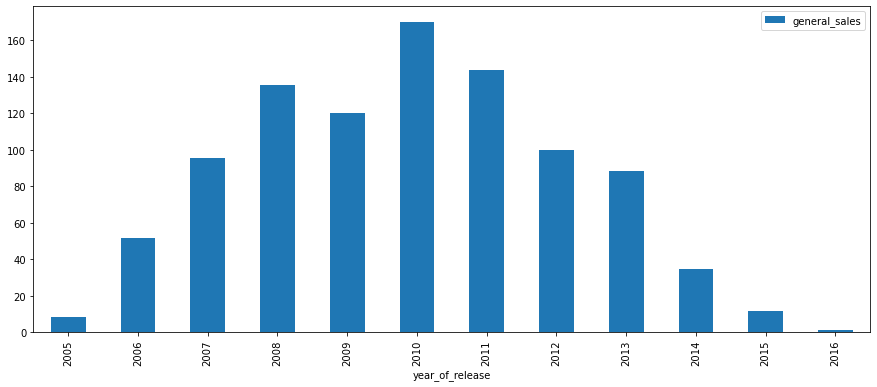

In [28]:
x36_average_lifespan = data.loc[data['platform'] == 'X360']
x36_average_lifespan_ = x36_average_lifespan.groupby('year_of_release').agg({'general_sales':'sum'}).sort_index()
x36_average_lifespan_.plot.bar(figsize = (15,6))
x36_average_lifespan_ = x36_average_lifespan_.reset_index()
x36_average_lifespan.groupby('platform').agg({'year_of_release' : 'nunique'}).median()

Можно слелать вывод что среднее время жизни популярных платформ составляет 8 лет.

### Сделать прогноз на 2017 год.

Срезать для прогноза последние 4 года.

In [29]:
forecast_for_2017 = data.loc[data['year_of_release'] > 2012]
forecast_for_2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,Year_of_Release,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,NaN,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,NaN,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,пропуск,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,пропуск,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,NaN,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,пропуск,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,пропуск,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,пропуск,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,пропуск,NaN,0.01


Определить на каких платформах было больше всего продаж.

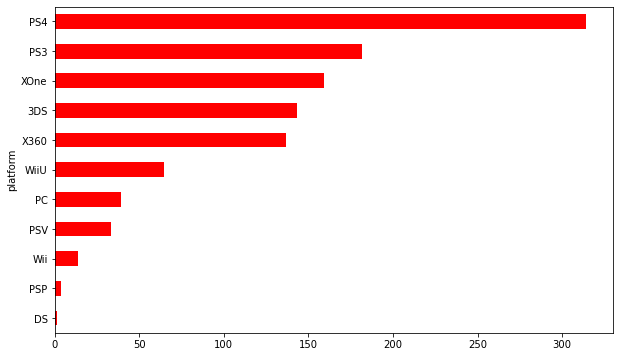

In [30]:
forecast_for_2017.groupby('platform')['general_sales'].sum().sort_values().plot(kind = "barh",figsize = (10,6),color = 'r');

Больше всего продаж было на платформах "PlayStation 4" и "PlayStation 3".

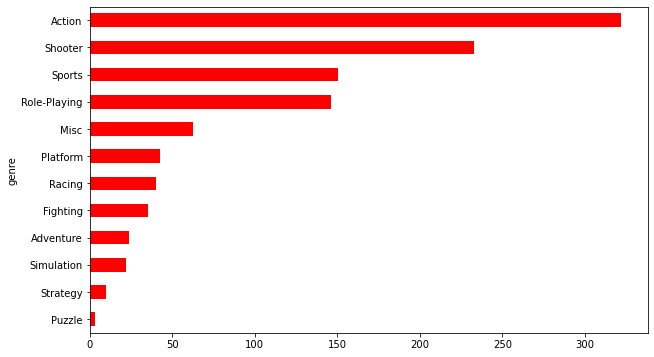

In [31]:
forecast_for_2017.groupby('genre')['general_sales'].sum().sort_values().plot(kind = "barh",figsize = (10,6),color = 'r');

Больше всего продаж было жанров Action и Shooter.

Посчитать суммарную выручку для каждого из послнедних 4 лет для каждой платформы.

In [32]:
platforms = ['PS4','XOne','3DS','PS3','X360']


df = pd.DataFrame( columns = ['platform', '2013', '2014','2015','2016'])
count = 1
for i in platforms:
    df.loc[count,'platform'] = i
    count += 1
df
count = 1
for i in platforms:
    cost_by_year=data.loc[(data['platform'] == i) & (data['year_of_release'] == 2014)]['general_sales'].sum()
    df.loc[count,'2014'] = cost_by_year
    count += 1
count = 1
for i in platforms:
    cost_by_year = data.loc[(data['platform'] == i) & (data['year_of_release'] == 2015)]['general_sales'].sum()
    df.loc[count,'2015'] = cost_by_year
    count += 1
count = 1
for i in platforms:
    cost_by_year = data.loc[(data['platform'] == i) & (data['year_of_release'] == 2016)]['general_sales'].sum()
    df.loc[count,'2016'] = cost_by_year
    count += 1
count = 1
for i in platforms:
    cost_by_year = data.loc[(data['platform'] == i) & (data['year_of_release'] == 2013)]['general_sales'].sum()
    df.loc[count,'2013'] = cost_by_year
    count += 1
df



,platform,2013,2014,2015,2016
1,PS4,25.99,100.0,118.9,69.25
2,XOne,18.96,54.07,60.14,26.15
3,3DS,56.57,43.76,27.78,15.14
4,PS3,113.25,47.76,16.82,3.6
5,X360,88.58,34.74,11.96,1.52


Визуализировать полученные данные.

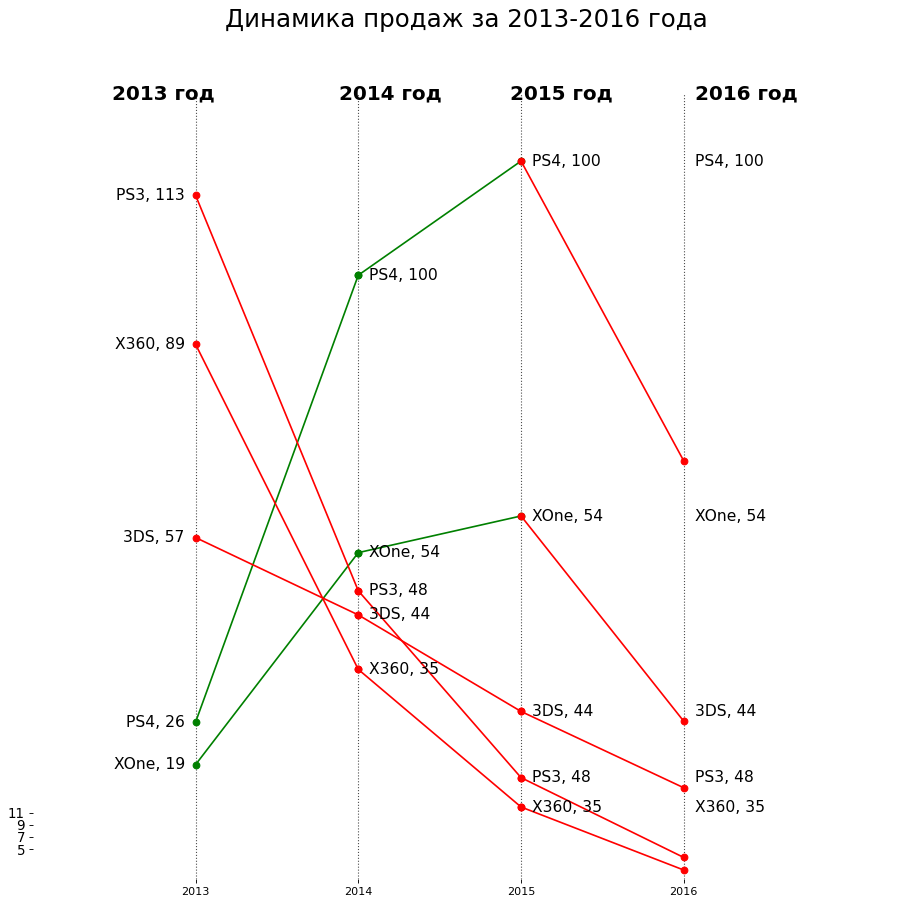

In [33]:
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l
def newline1(p2, p3, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p2[0],p3[0]], [p2[1],p3[1]], color='red' if p2[1]-p3[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l
def newline2(p3, p4, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p3[0],p4[0]], [p3[1],p4[1]], color='red' if p3[1]-p4[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Оформляем линии
ax.vlines(x=0.75, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=1.5, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=2.25, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=130, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Оформляем точки
ax.scatter(y=df['2013'], x=np.repeat(0.75, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['2014'], x=np.repeat(1.5, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['2015'], x=np.repeat(2.25, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['2016'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

#Оформляем текст
for p1, p2,p3,p4, c in zip(df['2013'],df['2014'], df['2015'],df['2016'], df['platform']):
    newline([0.75,p1], [1.5,p2])
    newline1([1.5,p2],[2.25,p3])
    newline2([2.25,p3],[3,p4])
    ax.text(0.75-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(1.5+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    ax.text(2.25+0.05, p3, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p3, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

    
# Оформляем заголовки
ax.text(0.75+0.09, 130, '2013 год', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(1.5-0.09, 130, '2014 год', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(2.25-0.05, 130, '2015 год', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 130, '2016 год', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Оформляем обозначения
ax.set_title("Динамика продаж за 2013-2016 года", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,140))
ax.set_xticks([0.75,1.5,2.25,3])
ax.set_xticklabels(["2013", "2014","2015","2016"])
plt.yticks(np.arange(5, 13, 2), fontsize=12)

# Убираем края
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()


Продажи растут у XOne и PS4

Определить количество выбивающихся значений для каждой из платформ.

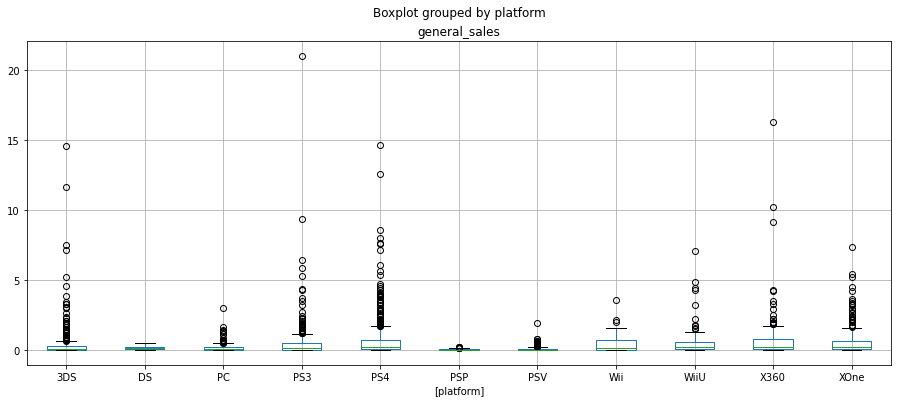

In [34]:
forecast_for_2017.boxplot(by = ['platform'], column = 'general_sales', figsize = (15,6));

Наиболее высокими выбивающимися значениями обладают как раз высичтанные нами выше популярные платформы.

Установить влияние на продажи игр оценок критиков и отзывов пользователей.

In [35]:
correlation = forecast_for_2017.groupby('platform')[['critic_score','user_score']].\
corrwith(forecast_for_2017['general_sales']).round(2)
correlation.reset_index(level =['platform'], inplace = True)
correlation = correlation.fillna(0)
correlation


C:\Users\vikto\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\vikto\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\vikto\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\vikto\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,platform,critic_score,user_score
0,3DS,0.36,0.24
1,DS,0.00,0.00
2,PC,0.20,-0.09
3,PS3,0.33,0.00
4,PS4,0.41,-0.03
5,PSP,0.00,-1.00
6,PSV,0.25,0.00
7,Wii,0.00,0.68
8,WiiU,0.38,0.42
9,X360,0.35,-0.01


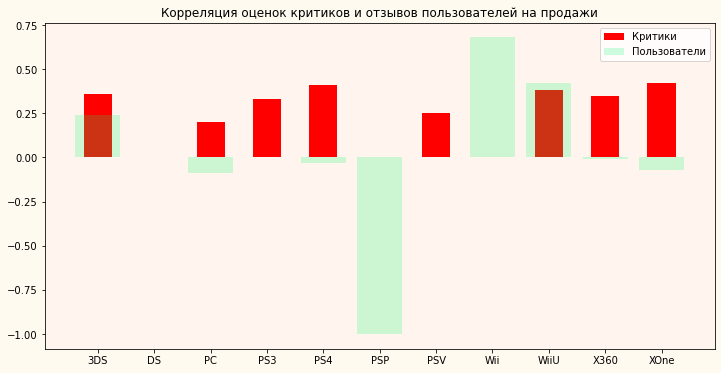

In [36]:
fig, ax = plt.subplots()


ax.bar(correlation['platform'], correlation['critic_score'],color = 'red',width = 0.5)

ax.bar(correlation['platform'], correlation['user_score'],color = (0, 1, 0.4, 0.2))

fig.set_figwidth(12)   
fig.set_figheight(6)   
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
ax.legend(['Критики', 'Пользователи'])
ax.set_title('Корреляция оценок критиков и отзывов пользователей на продажи')
plt.show()

Выяснить сколько игр приходится на каждый жанр.

Action    766
Name: genre, dtype: int64

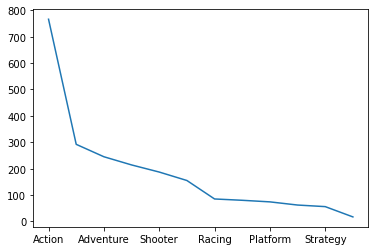

In [37]:
genre_count = forecast_for_2017['genre'].value_counts()
genre_count.plot();
display(genre_count.head(1))

Самым популярным жанром является Action: 766 игр приходится на этот жанр за 2013-2016 год.

Выявить самые популярные и самые непопулярные жанры игр по продажам.

In [38]:
date_for_recent_years = forecast_for_2017.groupby('genre').agg({'general_sales' : 'sum'}).reset_index()
date_for_recent_years = date_for_recent_years.sort_values(by = "general_sales",ascending = False)
date_for_recent_years

,genre,general_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Таким образом жанры распределяются по общим продажам.

Выяснить как продажи распределяются по количеству проданных игр. Какой жанр более прибыльный.

In [39]:
p = (date_for_recent_years.set_index('genre')['general_sales'] / genre_count)

p = p.reset_index().rename(columns = {'index': 'genre',0:'value'}).sort_values(by = 'value', ascending = False)
p

,genre,value
8,Shooter,1.245882
10,Sports,0.703972
4,Platform,0.576081
7,Role-Playing,0.499623
6,Racing,0.469294
2,Fighting,0.441375
0,Action,0.420196
3,Misc,0.405290
9,Simulation,0.350968
5,Puzzle,0.186471


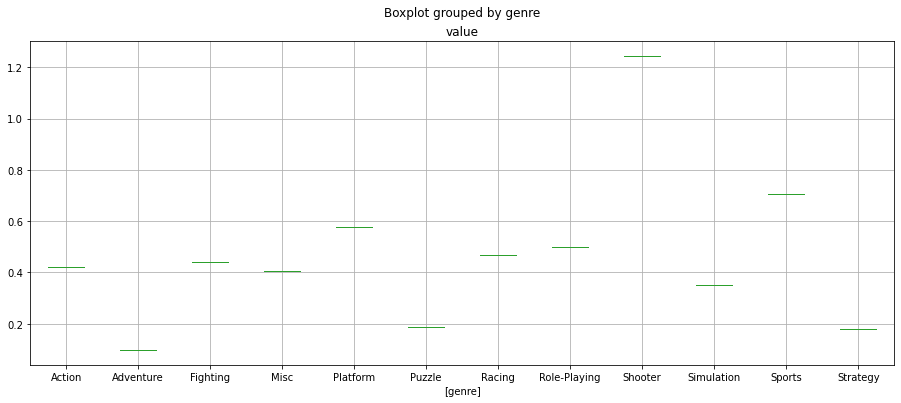

In [40]:
p.boxplot(by = ['genre'], column = 'value', figsize = (15,6));

Хоть и самые высокие продажи показал жанр "action", самое большое количество игр от показателя продаж наблюдалось за жанром "shooter".

## Проанализировать показатели продаж за 2016 год.

### Проанализировать показатели продаж по популярным платформам.

In [41]:
table_for_2016=data.loc[data['year_of_release']==2016]

#### Проанализировать показатели продаж по популярным платформам в Европе.

In [42]:
e_p1 = table_for_2016.groupby('platform').agg({'eu_sales': 'sum'}).sort_values('eu_sales',\
                                                                 ascending=False).head().reset_index()
e_p1

,platform,eu_sales
0,PS4,31.78
1,XOne,9.63
2,PC,3.53
3,3DS,2.33
4,WiiU,1.48


#### Проанализировать показатели продаж по популярным платформам в Америке.

In [43]:
na_p1 = table_for_2016.groupby('platform').agg({'na_sales': 'sum'}).sort_values('na_sales',\
                                                                 ascending=False).head().reset_index()
na_p1

,platform,na_sales
0,PS4,21.49
1,XOne,14.27
2,3DS,4.14
3,WiiU,2.10
4,PC,1.36


#### Проанализировать показатели продаж по популярным платформам в Японии.

In [44]:
j_p1 = table_for_2016.groupby('platform').agg({'jp_sales': 'sum'}).sort_values('jp_sales',\
                                                                 ascending=False).head().reset_index()
j_p1

,platform,jp_sales
0,3DS,8.03
1,PS4,5.74
2,PSV,3.56
3,PS3,1.30
4,WiiU,0.67


#### Проанализировать показатели продаж по популярным платформам в других регионах мира.

In [45]:
o_p1=table_for_2016.groupby('platform').agg({'other_sales': 'sum'}).sort_values('other_sales',\
                                                                 ascending=False).head().reset_index()
o_p1

,platform,other_sales
0,PS4,10.24
1,XOne,2.24
2,3DS,0.64
3,PS3,0.37
4,PC,0.36


Визуализировать данные для оценки и сравнения.

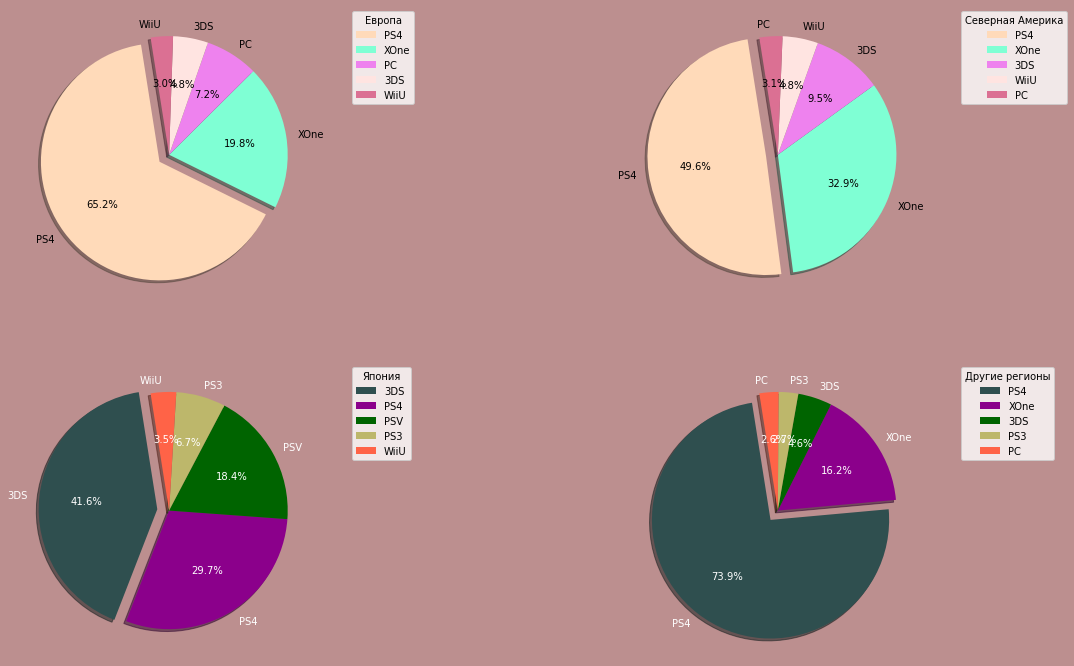

In [46]:
fig1, ax1 = plt.subplots(2,2,figsize = (20,12),facecolor = "#bc8f8f")
explode = (0.1,0,0,0,0)
mycolors = ["#2f4f4f", "#8b008b", "#006400", "#bdb76b","#ff6347"]
mycolors2 = ["#ffdab9", "#7fffd4", "#ee82ee", "#ffe4e1","#db7093"]
ax1[0,0].pie(e_p1['eu_sales'],explode = explode, labels = e_p1['platform'],
        shadow = True, startangle = 99,colors = mycolors2,autopct = '%1.1f%%')
ax1[0,1].pie(na_p1['na_sales'],explode = explode, labels = na_p1['platform'],
        shadow = True, startangle = 99,colors = mycolors2,autopct = '%1.1f%%')


ax1[1,0].pie(j_p1['jp_sales'],explode=explode, labels = j_p1['platform'],
        shadow = True, startangle=99,colors=mycolors,autopct = '%1.1f%%', textprops={'color':"w"})




ax1[1,1].pie(o_p1['other_sales'],explode=explode, labels = o_p1['platform'],
        shadow = True, startangle=99,colors=mycolors,autopct = '%1.1f%%', textprops={'color':"w"})

ax1[0,0].legend(title = "Европа",loc = 'upper left', bbox_to_anchor = (1.1, 1.0))
ax1[0,1].legend(title = "Северная Америка",loc = 'upper left', bbox_to_anchor = (1.1, 1.0))
ax1[1,0].legend(title = "Япония",loc = 'upper left', bbox_to_anchor = (1.1, 1.0))
ax1[1,1].legend(title = "Другие регионы",loc = 'upper left', bbox_to_anchor = (1.1, 1.0))

plt.rcParams['axes.facecolor'] = '#66cdaa';

### Визуализировать главные позиции для каждого региона отдельно.

#### Портрет жителя Европы:

Житель Европы использует чаще других PS4 и XOne.

Составить список самых популярных игр по параметрам PS4 и XOne.

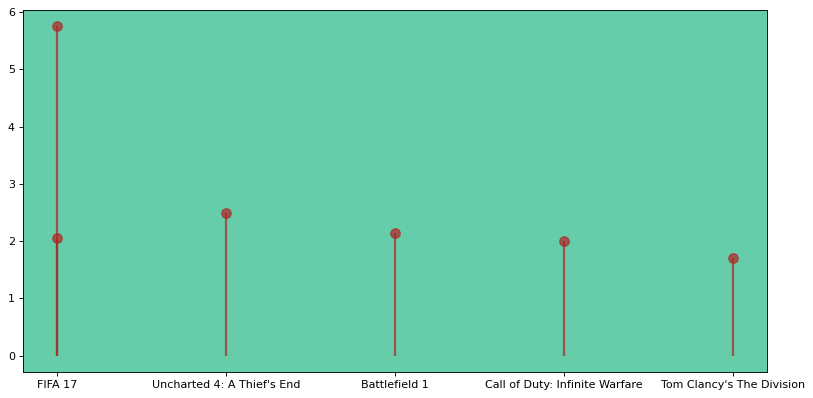

In [47]:
portrait_of_a_resident_of_europe_0 = data.loc[(data['platform'] == 'XOne')|(data['platform'] == 'PS4')]
portrait_of_a_resident_of_europe_0 = portrait_of_a_resident_of_europe_0.loc[portrait_of_a_resident_of_europe_0\
                                                                          ['year_of_release'] == 2016]
portrait_of_a_resident_of_europe_0 = portrait_of_a_resident_of_europe_0.sort_values(by = 'eu_sales',ascending=False).head(6)

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.vlines(x=portrait_of_a_resident_of_europe_0.name, ymin = 0, ymax = portrait_of_a_resident_of_europe_0.eu_sales,\
          color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_a_resident_of_europe_0.name, y = portrait_of_a_resident_of_europe_0.eu_sales,\
           s = 75, color = 'firebrick', alpha = 0.7);

Любимые игры жителя Европы на популярных платформах:

FIFA 17;

Uncharted 4: A Thief's End";

"Battlefield 1;

Call of Duty: Infinite Warfare;

Tom Clancy's The Division;

#### Портрет жителя Америки:

Житель Америки использует чаще других PS4 и XOne.

Составить список самых популярных игр по параметрам PS4 и XOne.

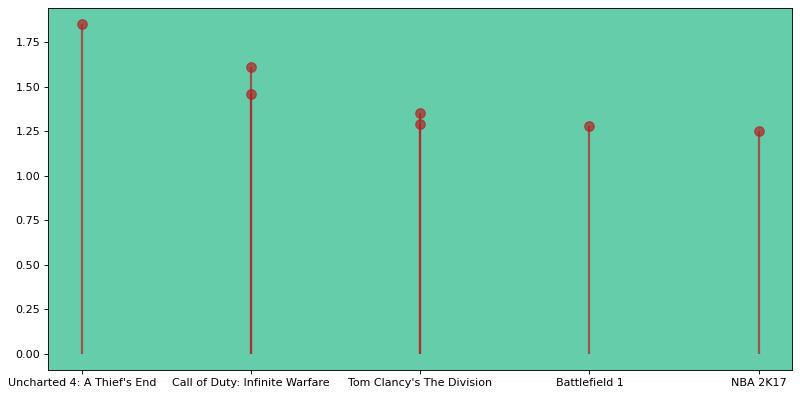

In [48]:
portrait_of_an_american_0 = data.loc[(data['platform'] == 'XOne')|(data['platform'] == 'PS4')]
portrait_of_an_american_0 = portrait_of_an_american_0.loc[portrait_of_an_american_0\
                                                                          ['year_of_release'] == 2016]
portrait_of_an_american_0 = portrait_of_an_american_0.sort_values(by = 'na_sales',ascending = False).head(7)

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.vlines(x = portrait_of_an_american_0.name, ymin = 0, ymax = portrait_of_an_american_0.na_sales,\
          color='firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_an_american_0.name, y = portrait_of_an_american_0.na_sales,\
           s = 75, color = 'firebrick', alpha = 0.7);

Любимые игры жителя Северной Америки на популярных платформах:

Uncharted 4: A Thief's End;

Call of Duty: Infinite Warfare;

Tom Clancy's The Division;

Battlefield 1;

NBA 2K17;

#### Портрет жителя Японии:

Житель Японии использует чаще других 3DS и PS4.

Составить список самых популярных игр по параметрам 3DS и PS4.

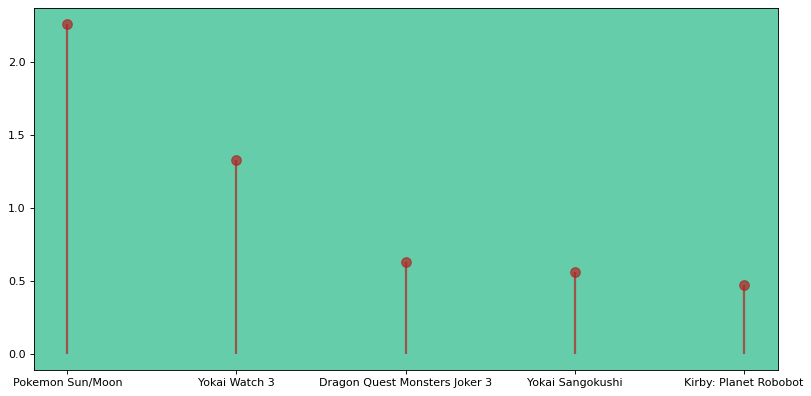

In [49]:
portrait_of_a_resident_of_japan_0 = data.loc[(data['platform'] == '3DS')|(data['platform'] == 'PS4')]
portrait_of_a_resident_of_japan_0 = portrait_of_a_resident_of_japan_0.loc[portrait_of_a_resident_of_japan_0\
                                                                          ['year_of_release']==2016]
portrait_of_a_resident_of_japan_0 = portrait_of_a_resident_of_japan_0.sort_values(by = 'jp_sales',ascending = False).head(5)

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.vlines(x = portrait_of_a_resident_of_japan_0.name, ymin = 0, ymax = portrait_of_a_resident_of_japan_0.jp_sales,\
          color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_a_resident_of_japan_0.name, y = portrait_of_a_resident_of_japan_0.jp_sales,\
           s = 75, color = 'firebrick', alpha = 0.7);

Любимые игры жителя Японии на популярных платформах:

Pokemon Sun/Moon;

Yokai Watch 3;

Dragon Quest Monsters Joker 3;

Yokai Sangokushi;

Kirby: Planet Robobot;

### Проанализировать показатели продаж по популярным жанрам.

#### Проанализировать показатели продаж по популярным жанрам в Европе.

In [50]:
e_g1 = table_for_2016.groupby('genre').agg({'eu_sales':'sum'}).\
sort_values('eu_sales',ascending = False).head().reset_index()
e_g1

,genre,eu_sales
0,Shooter,15.90
1,Sports,12.01
2,Action,10.68
3,Role-Playing,4.28
4,Racing,1.77


#### Проанализировать показатели продаж по популярным жанрам в Северной Америке.

In [51]:
na_g1 = table_for_2016.groupby('genre').agg({'na_sales':'sum'}).\
sort_values('na_sales',ascending = False).head().reset_index()
na_g1

,genre,na_sales
0,Shooter,16.24
1,Action,9.29
2,Sports,7.54
3,Role-Playing,5.89
4,Fighting,1.84


#### Проанализировать показатели продаж по популярным жанрам в Японии.

In [52]:
j_g1 = table_for_2016.groupby('genre').agg({'jp_sales':'sum'}).\
sort_values('jp_sales',ascending = False).head().reset_index()
j_g1

,genre,jp_sales
0,Action,7.07
1,Role-Playing,6.61
2,Adventure,1.18
3,Shooter,1.06
4,Misc,1.04


#### Проанализировать показатели продаж по популярным жанрам в других регионах .

In [53]:
o_g1 = table_for_2016.groupby('genre').agg({'other_sales':'sum'}).\
sort_values('other_sales',ascending = False).head().reset_index()
o_g1

,genre,other_sales
0,Shooter,5.02
1,Action,3.07
2,Sports,3.02
3,Role-Playing,1.40
4,Fighting,0.54


Визуализировать данные для оценки и сравнения.

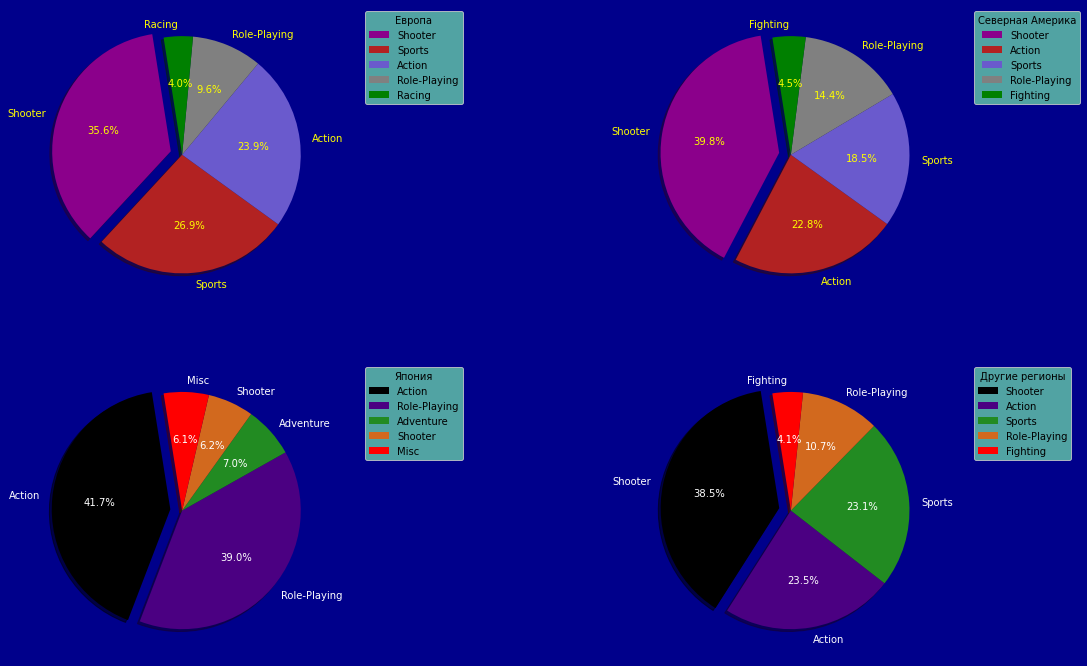

In [54]:
fig1, ax1 = plt.subplots(2,2,figsize = (20,12),facecolor = '#00008B')
explode = (0.1,0,0,0,0)
mycolors = ["black", "#4B0082", "#228B22", "#D2691E","red"]
mycolors2 = ["#8B008B", "#B22222", "#6A5ACD", "grey","green"]
ax1[0,0].pie(e_g1['eu_sales'],explode = explode, labels = e_g1['genre'],
        shadow = True, startangle = 99,colors = mycolors2,autopct = '%1.1f%%',textprops = {'color':"yellow"})
ax1[0,1].pie(na_g1['na_sales'],explode = explode, labels = na_g1['genre'],
        shadow = True, startangle = 99,colors = mycolors2,autopct = '%1.1f%%', textprops = {'color':"yellow"})


ax1[1,0].pie(j_g1['jp_sales'],explode = explode, labels = j_g1['genre'],
        shadow = True, startangle = 99,colors = mycolors,autopct = '%1.1f%%', textprops = {'color':"w"})




ax1[1,1].pie(o_g1['other_sales'],explode=explode, labels=o_g1['genre'],
        shadow = True, startangle = 99,colors = mycolors,autopct = '%1.1f%%', textprops = {'color':"w"})

ax1[0,0].legend(title = "Европа",loc='upper left', bbox_to_anchor = (1.1, 1.0))
ax1[0,1].legend(title = "Северная Америка",loc='upper left', bbox_to_anchor = (1.1, 1.0))
ax1[1,0].legend(title = "Япония",loc='upper left', bbox_to_anchor = (1.1, 1.0))
ax1[1,1].legend(title = "Другие регионы",loc='upper left', bbox_to_anchor = (1.1, 1.0))

plt.rcParams['axes.facecolor'] = '#87CEEB';

#### Портрет жителя Европы:

Самые популярные два жанра для жителя Европы:Shooter и Sports.

Составить список игр связанных с этим жанром.

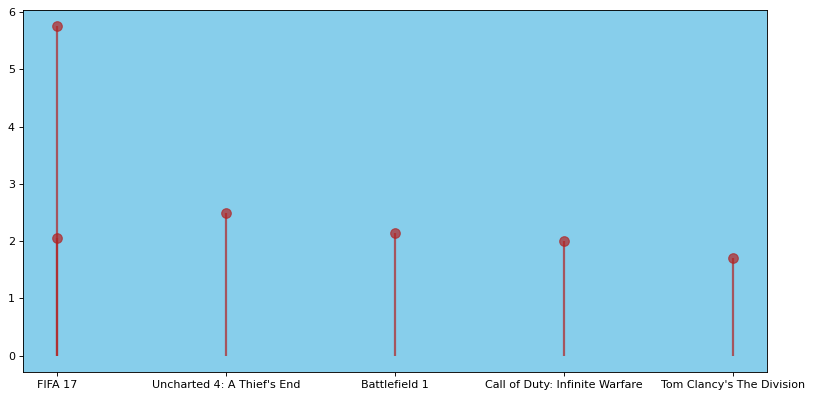

In [55]:
portrait_of_a_resident_of_europe = data.loc[(data['genre'] == 'Sports')|(data['genre'] == 'Shooter')]
portrait_of_a_resident_of_europe = portrait_of_a_resident_of_europe.loc[portrait_of_a_resident_of_europe['year_of_release']\
                                                                        == 2016]
portrait_of_a_resident_of_europe = portrait_of_a_resident_of_europe.sort_values(by = 'eu_sales',ascending=False).head(6)

fig, ax = plt.subplots(figsize = (12,6), dpi= 80)
ax.vlines(x = portrait_of_a_resident_of_europe.name, ymin = 0, ymax = portrait_of_a_resident_of_europe.eu_sales,\
          color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_a_resident_of_europe.name, y = portrait_of_a_resident_of_europe.eu_sales,\
           s = 75, color = 'firebrick', alpha=0.7);

Самые востребованные игры этих жанров:

FIFA 17;

Uncharted 4: A Thief's End;

Battlefield 1;

Call of Duty: Infinite Warfare;

Tom Clancy's The Division;


![Image_for_Europe](https://raw.githubusercontent.com/Hope122333/proj/main/success/for_a_project_with_games/%D0%95%D0%B2%D1%80%D0%BE%D0%BF%D0%B0%20%D0%B8%D0%B3%D1%80%D1%8B.jpg)

#### Портрет жителя Северной Америки:

Самые популярные два жанра для жителя Северной Америки:Shooter и Action.

Составить список игр связанных с этим жанром.

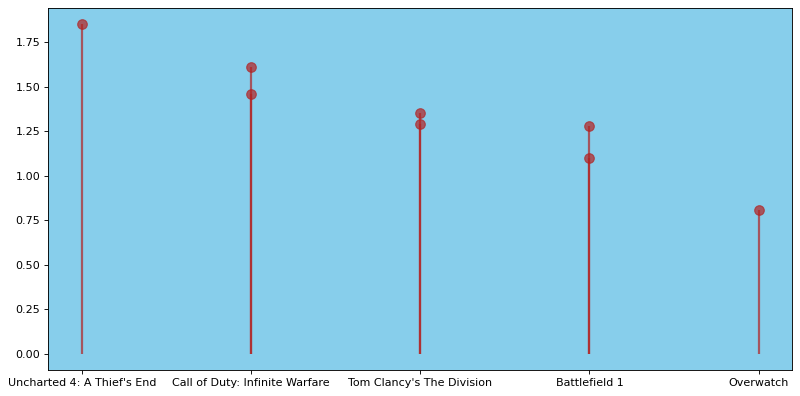

In [56]:
portrait_of_an_american = data.loc[(data['genre'] == 'Action')|\
                                                  (data['genre'] == 'Shooter')]
portrait_of_an_american = portrait_of_an_american.loc[portrait_of_an_american['year_of_release'] == 2016]
portrait_of_an_american = portrait_of_an_american.sort_values(by = 'na_sales',ascending = False).head(8)

fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax.vlines(x = portrait_of_an_american.name, ymin = 0, ymax = portrait_of_an_american.na_sales,\
          color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_an_american.name, y=portrait_of_an_american.na_sales,\
           s = 75, color = 'firebrick', alpha = 0.7);

Самые востребованные игры этих жанров:

Uncharted 4: A Thief's End;

Call of Duty: Infinite Warfare;

Tom Clancy's The Division;

Battlefield 1;

Overwatch;

![Image_for_USA](https://raw.githubusercontent.com/Hope122333/proj/main/success/for_a_project_with_games/%D0%A1%D0%B5%D0%B2%D0%B5%D1%80%D0%BD%D0%B0%D1%8F%20%D0%90%D0%BC%D0%B5%D1%80%D0%B8%D0%BA%D0%B0%20%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B.jpg)

#### Портрет жителя Японии:

Самые популярные два жанра для жителя Японии:Role-Playing и Action.

Составить список игр связанных с этим жанром.

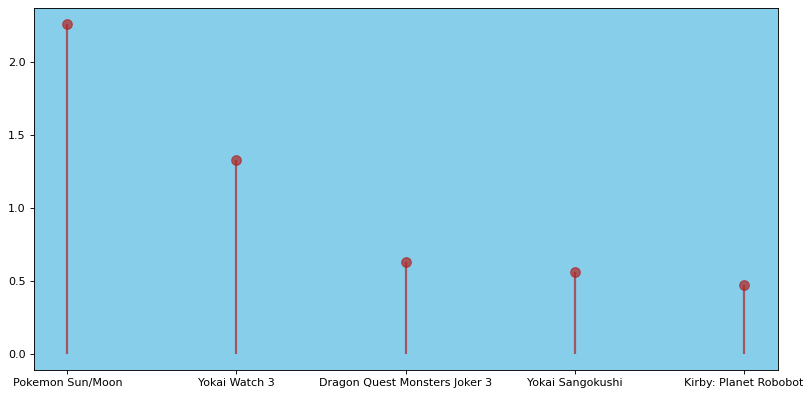

In [57]:
portrait_of_a_resident_of_japan = data[(data['genre'] == 'Action')|\
                                                          (data['genre'] == 'Role-Playing')]
portrait_of_a_resident_of_japan = portrait_of_a_resident_of_japan.loc[portrait_of_a_resident_of_japan['year_of_release'] == 2016]
portrait_of_a_resident_of_japan = portrait_of_a_resident_of_japan.sort_values(by = 'jp_sales',ascending = False).head(5)

fig, ax = plt.subplots(figsize = (12,6), dpi= 80)
ax.vlines(x=portrait_of_a_resident_of_japan.name, ymin = 0, ymax = portrait_of_a_resident_of_japan.jp_sales,\
          color = 'firebrick', alpha = 0.7, linewidth = 2)
ax.scatter(x = portrait_of_a_resident_of_japan.name, y = portrait_of_a_resident_of_japan.jp_sales,\
           s = 75, color = 'firebrick', alpha = 0.7);

Самые востребованные игры этих жанров:

Pokemon Sun/Moon;

Yokai Watch 3;

Dragon Quest Monsters Joker 3;

Yokai Sangokushi;

Kirby: Planet Robobot;

![Image_for_Japan](https://raw.githubusercontent.com/Hope122333/proj/main/success/for_a_project_with_games/%D0%AF%D0%BF%D0%BE%D0%BD%D0%B8%D1%8F%20%D0%B8%D0%B3%D1%80%D1%8B%20%D0%BF%D0%BE%20%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D0%BC.jpg)

Изучить влияние рейтинга на продажи для каждого региона. Визуализировать это.

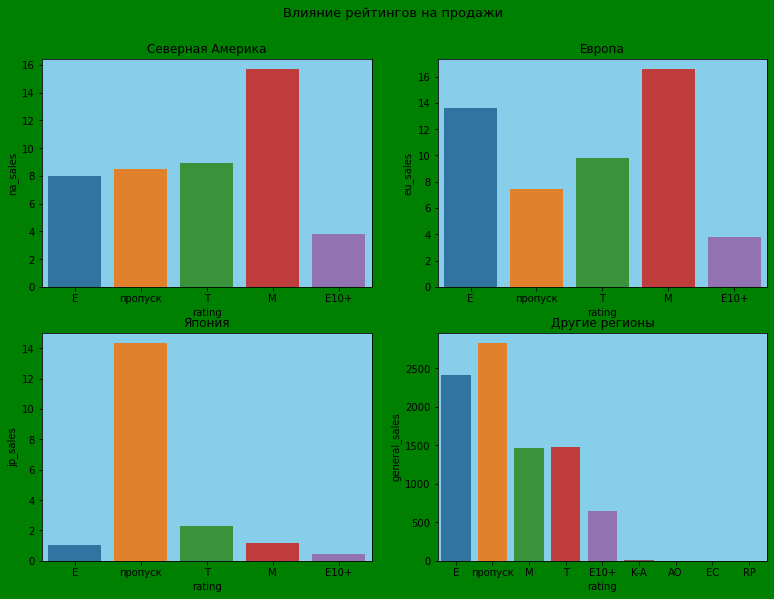

In [58]:
fig, ax1 = plt.subplots(2,2, figsize=(13,9),facecolor = 'green', edgecolor = 'red')
sns.barplot(y='na_sales', x ='rating', data = table_for_2016,estimator=sum, ax = ax1[0,0],ci = False);
sns.barplot(y='eu_sales', x ='rating', data = table_for_2016,estimator=sum, ax = ax1[0,1],ci = False);
sns.barplot(y='jp_sales', x ='rating', data = table_for_2016,estimator=sum, ax = ax1[1,0],ci = False);
sns.barplot(y='general_sales', x ='rating', data = data,estimator=sum, ax = ax1[1,1],ci = False);

fig.subplots_adjust(top=0.9)
fig.suptitle('Влияние рейтингов на продажи', fontsize=13)  
ax1[0,0].set_title('Северная Америка')
ax1[0,1].set_title('Европа')
ax1[1,0].set_title('Япония')
ax1[1,1].set_title('Другие регионы');

Будем считать что пропуски у нас равны не имеющемуся рейтингу, поэтому можно сделать вывод,
что рейтинга нет в Японии на большом количестве проданных игр, значит в Японии нет зависомости от рейтинга при
распространении игр, а Северной Америке такая зависимость есть, особенно на категорию M,тоже самое можно сказать и
о Европе. В других странах зависимость, есть но небольшая.

### Сформулировать гипотезу:

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний рейтинг (rating) Xbox One = средний рейтинг (rating) PC`

H_a: Средний рейтинг (rating) Xbox One ≠ средний рейтинг(rating) PC`

Средний рейтинг для xbox равен: 6.59848484848485 
 Средний рейтинг для PC равен: 6.29777777777778


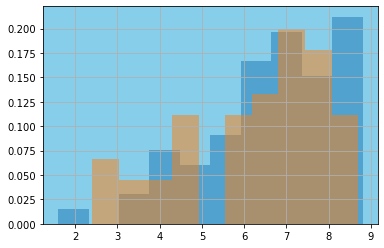

In [59]:
average_rating_xbox_one = table_for_2016.loc[(table_for_2016['platform'] == 'XOne') & \
                                           (table_for_2016['year_of_release'] > 2015)]['user_score'].dropna()
average_rating_pc = table_for_2016.loc[(table_for_2016['platform'] == 'PC')&
                                                        (table_for_2016['year_of_release'] > 2015)]['user_score'].dropna()

print('Средний рейтинг для xbox равен:',average_rating_xbox_one.mean(),'\n',\
      'Средний рейтинг для PC равен:',average_rating_pc.mean())
average_rating_xbox_one.hist(alpha = 0.5,weights = [1./len(average_rating_xbox_one)]\
                            * len(average_rating_xbox_one))
average_rating_pc.hist(alpha = 0.5,weights = [1./len(average_rating_pc)]\
                            * len(average_rating_pc));


Провести тест.

In [60]:
alpha = .01

results = st.ttest_ind(average_rating_xbox_one, average_rating_pc, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
     print("Отвергаем нулевую гипотезу")
    
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.3516273078893254
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу,а это значит, что вероятность получить разные рейтинги 3 с половиной процента.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


H_0: Средний рейтинг (rating) Action = средний рейтинг(rating) Sports`

H_a: Средний рейтинг (rating) Action ≠ средний рейтинг (rating) Sports`

Средний рейтинг для Action равен: 6.638823529411767 
 Средний рейтинг для Sports равен: 5.432432432432433


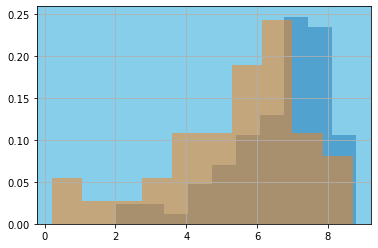

In [61]:
average_rating_action = table_for_2016.loc[(table_for_2016['genre'] == 'Action')&\
                                        (table_for_2016['year_of_release'] > 2015)]['user_score'].dropna()
average_rating_sports = table_for_2016.loc[(table_for_2016['genre'] == 'Sports')&\
                                         (table_for_2016['year_of_release'] > 2015)]['user_score'].dropna()

print('Средний рейтинг для Action равен:',average_rating_action.mean(),'\n',\
      'Средний рейтинг для Sports равен:',average_rating_sports.mean())

average_rating_action.hist(alpha = 0.5,weights = [1. / len(average_rating_action)]\
                            * len(average_rating_action))
average_rating_sports.hist(alpha = 0.5,weights = [1. / len(average_rating_sports)]\
                            * len(average_rating_sports));

Провести тест.

In [62]:
alpha = .01

results = st.ttest_ind(average_rating_action, average_rating_sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0020250230280633263
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, а это значит,у нас нет практически вероятности получить одинаковые рейтинги.

### Общий вывод:

В рамках исследования мы выявили рост продаж на популярных платформах, таких как PS4 и XOne
Мы установили динамику развития этих платформ , установили среднее медианное время жизни платформ, что может пригодится
в оценке на близжайшее время роста платформ. Мы выявили, что самыми популярными жанрами являются: Action и Shooter.
Мы увидели, что большинство популярных игр разрабатывались на разных платформах, это тенденция последних лет
и это также можно использовать для продвижения продукта.
Мы также составили портрет трех регионов: Европы, Северной Америки и Японии.
В Европе самым популярным жанром является Shooter и Sports, в Северной Америке:
Shooter и Action, а в Японии:Role-Playing и Action. 
Самыми популярными платформами в Европе и Северной Америке являются:Playstation4 и XOne,а в Японии: Nintendo 3DS и Playstation4.
Если ссылаться на Википедию, то
"Эксклюзивные для консоли игры также помогают повышать продажи. Так, например, выход игры Infamous:
Second Son, позволил повысить уровень продаж консолей PS4 на 106 %". Таким образом, популярная ныне консоль
становится популярнее благодаря качеству игр, поэтому это тоже можно учитывать для создания нового продукта.